In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic                # Holistic model
mp_drawing = mp.solutions.drawing_utils            # Drawing utilities

In [3]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)       # COLOR CONVERSION bgr to rgb
    image.flags.writeable = False                       # Image writeable status to false ,no longer writable
    results = model.process(image)                      # Make Prediction
    image.flags.writeable = True                        # Image is now writeable
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)       # COLOR CONVERSION rgb to bgr
    return image,results

In [4]:
#cv2.cvtColor??
mp.solutions.holistic??

In [5]:
def draw_landmarks(image,results):                      # Grab the result and render it on to the images
    mp_drawing.draw_landmarks(image ,results.face_landmarks ,mp_holistic.FACEMESH_TESSELATION) # draw face connection
    mp_drawing.draw_landmarks(image ,results.pose_landmarks ,mp_holistic.POSE_CONNECTIONS) #draw pose connection
    mp_drawing.draw_landmarks(image ,results.left_hand_landmarks ,mp_holistic.HAND_CONNECTIONS) #draw hand connection
    mp_drawing.draw_landmarks(image ,results.right_hand_landmarks ,mp_holistic.HAND_CONNECTIONS) # Draw left Connection

In [7]:
# mp_holistic.POSE_CONNECTIONS
# mp_drawing.draw_landmarks??

In [6]:
def draw_styled_landmarks(image,results):
    # draw face connection
    mp_drawing.draw_landmarks(image ,results.face_landmarks ,mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(255,0,25),thickness=1,circle_radius=1),  # face dots
                             mp_drawing.DrawingSpec(color=(80,98,121),thickness=1,circle_radius=1)   #face line
                             ) 
    #draw pose connection
    mp_drawing.draw_landmarks(image ,results.pose_landmarks ,mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(180,212,10),thickness=2,circle_radius=4), #dots
                             mp_drawing.DrawingSpec(color=(80,4,121),thickness=2,circle_radius=4)  #lines
                             ) 
    #draw hand connection
    mp_drawing.draw_landmarks(image ,results.left_hand_landmarks ,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76),thickness=2,circle_radius=4),  #dots
                             mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)  #lines
                             ) 
    #draw hand connection
    mp_drawing.draw_landmarks(image ,results.right_hand_landmarks ,mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(0,128,128),thickness=2,circle_radius=4),
                             mp_drawing.DrawingSpec(color=(0,0,128),thickness=2,circle_radius=2)
                             )

In [7]:
cap = cv2.VideoCapture(0)                                           # Device value is zero # this line access the webcam

# Access mediapipe model       # intial detection         # tracking confindence
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    while cap.isOpened():                                           #if webcam open

        #Read feed
        ret, frame = cap.read()

        # Make detection 
        image , results = mediapipe_detection(frame,holistic)
        print(results)
        
        # Draw landmarks 
        draw_styled_landmarks(image,results)
        
        
        #Show to screen
        cv2.imshow('OpenCV Feed',image)                             # Frame name='OpenCV Feed'

        # Break escape
                                                         # 0xFF is used to filter out any extra bits in the keypress event value, 
                                                         #ensuring that only the lower 8 bits (the ASCII value) are considered for the comparison with the 'q' key.
        if cv2.waitKey(10) & 0xFF == ord('q'):                      # if current key is q , break out of loop 
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
## cap.release()
cv2.destroyAllWindows()

In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
#frame
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame,results)

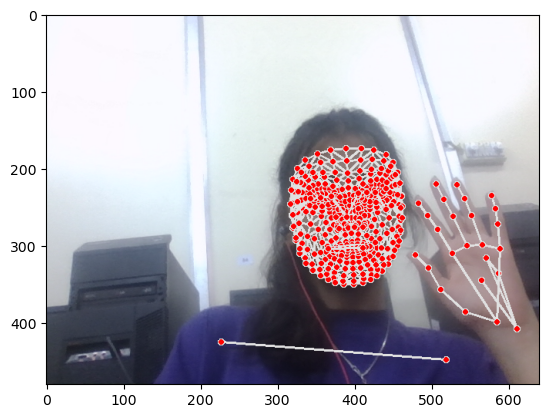

In [12]:
#plt.imshow(frame)

plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Value

In [13]:
#results.pose_landmarks

In [14]:
#results.pose_landmarks.landmark[0].visibility

In [15]:
len(results.face_landmarks.landmark)

468

In [16]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [17]:
#print(pose)

In [18]:
#print('Pose Length : ',len(pose))

In [19]:
pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks :
    np.zeros(1404)

In [21]:
print('Pose Shape : ',pose.shape)

Pose Shape :  (132,)


In [22]:
len(results.face_landmarks.landmark)*3

1404

In [23]:
np.zeros(21*3).shape

(63,)

In [24]:
print(face)

[ 0.62122798  0.61572707 -0.03247879 ...  0.6896711   0.47136018
  0.02207678]


In [25]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [26]:
result_test = extract_keypoints(results)

In [27]:
result_test

array([ 0.60989714,  0.54921806, -1.11152267, ...,  0.        ,
        0.        ,  0.        ])

In [28]:
np.save('0',result_test)

In [29]:
np.load('0.npy')

array([ 0.60989714,  0.54921806, -1.11152267, ...,  0.        ,
        0.        ,  0.        ])

In [30]:
# 4. Setup folders for collection

In [31]:
# path for the exported data,numpy arrays
DATA_PATH = os.path.join('MP_Data')

#Actions that we try to detect
actions = np.array(['hello','thanks','iloveyou'])
# 30 videos worth of data
no_sequences = 30
#videos are going to be 30 frames in length
sequence_length = 30

In [32]:
#hello 
#thanks
#iloveyou

In [33]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. collect keypoints values for training and testing

In [34]:
cap = cv2.VideoCapture(0)             # Device value is zero # this line access the webcam

# Access mediapipe model       # intial detection         # tracking confindence
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5)as holistic:
    # New loop
    # Loop through actions
    for action in actions:
        # Loop throungh sequences aka video
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
    
                #Read feed
                ret, frame = cap.read()

                # Make detection 
                image , results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image,results)
                
                # New Apply wait logic
                if frame_num == 0:
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1,(0,255,0),4,cv2.LINE_AA)
                    cv2.putText(image,'COLLECTION Frames for {} Video Number{}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image,'COLLECTION frames for {} video number{}'.format(action,sequence),(15,12),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),1,cv2.LINE_AA)
                
                # New Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                
                #Show to screen
                cv2.imshow('OpenCV Feed',image) # Frame name='OpenCV Feed'

                # Break escape
                if cv2.waitKey(10) & 0xFF == ord('q'): # if current key is q , break out of loop
                    break
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

In [35]:
cap.release()
cv2.destroyAllWindows()

# 6. preprocessing data and create labels and features

In [36]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [37]:
label_map = {label:num for num,label in enumerate(actions)}

In [38]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [39]:
sequences ,labels = [],[]
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH , action , str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [40]:
#np.array(sequences).shape

In [41]:
#np.array(labels).shape

In [42]:
x = np.array(sequences)

In [43]:
x.shape

(90, 30, 1662)

In [44]:
y = to_categorical(labels).astype(int)

In [45]:
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [46]:
x_train,x_test,y_train,y_test,=train_test_split(x,y,test_size=0.05,random_state=45)

print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

x_train (85, 30, 1662)
x_test (5, 30, 1662)
y_train (85, 3)
y_test (5, 3)


# 7.Build and train lstm nn

In [47]:
from tensorflow.keras.models import Sequential  # builds sequential nn
from tensorflow.keras.layers import LSTM,Dense  # LSTM layes 
from tensorflow.keras.callbacks import TensorBoard  #trace



log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

model = Sequential()

model.add(LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30,1662)))
model.add(LSTM(128, return_sequences = True, activation = 'relu'))
model.add(LSTM(64, return_sequences = False, activation = 'relu'))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(actions.shape[0], activation = 'softmax'))

In [48]:
#res= [.7,0.2,0.1]
#res

In [49]:
#actions[np.argmax(res)]

In [50]:
model.compile(optimizer = 'Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [104]:
model.fit(x_train,y_train,epochs=500,callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 8s 309ms/step - loss: 1.0899 - categorical_accuracy: 0.3176
Epoch 2/500
3/3 [==============================] - 1s 266ms/step - loss: 1.0724 - categorical_accuracy: 0.3176
Epoch 3/500
3/3 [==============================] - 1s 506ms/step - loss: 1.1580 - categorical_accuracy: 0.3882
Epoch 4/500
3/3 [==============================] - 1s 307ms/step - loss: 1.0336 - categorical_accuracy: 0.5176
Epoch 5/500
3/3 [==============================] - 1s 184ms/step - loss: 1.0358 - categorical_accuracy: 0.4588
Epoch 6/500
3/3 [==============================] - 1s 231ms/step - loss: 0.9630 - categorical_accuracy: 0.4941
Epoch 7/500
3/3 [==============================] - 0s 104ms/step - loss: 0.9530 - categorical_accuracy: 0.4824
Epoch 8/500
3/3 [==============================] - 1s 161ms/step - loss: 1.1778 - categorical_accuracy: 0.4941
Epoch 9/500
3/3 [==============================] - 1s 194ms/step - loss: 1.2214 - categorical_accuracy: 0.3412
E

Epoch 74/500
3/3 [==============================] - 1s 318ms/step - loss: 329.2059 - categorical_accuracy: 0.3294
Epoch 75/500
3/3 [==============================] - 0s 148ms/step - loss: 340.9430 - categorical_accuracy: 0.3765
Epoch 76/500
3/3 [==============================] - 1s 210ms/step - loss: 815.1489 - categorical_accuracy: 0.3412
Epoch 77/500
3/3 [==============================] - 0s 200ms/step - loss: 593.3191 - categorical_accuracy: 0.3294
Epoch 78/500
3/3 [==============================] - 1s 184ms/step - loss: 606.6187 - categorical_accuracy: 0.2941
Epoch 79/500
3/3 [==============================] - 1s 170ms/step - loss: 339.0080 - categorical_accuracy: 0.4118
Epoch 80/500
3/3 [==============================] - 0s 96ms/step - loss: 239.4901 - categorical_accuracy: 0.3412
Epoch 81/500
3/3 [==============================] - 0s 182ms/step - loss: 220.4359 - categorical_accuracy: 0.2941
Epoch 82/500
3/3 [==============================] - 0s 192ms/step - loss: 105.5364 - cate

3/3 [==============================] - 1s 232ms/step - loss: 0.2657 - categorical_accuracy: 0.9412
Epoch 219/500
3/3 [==============================] - 1s 354ms/step - loss: 0.2965 - categorical_accuracy: 0.9059
Epoch 220/500
3/3 [==============================] - 1s 356ms/step - loss: 0.3559 - categorical_accuracy: 0.8824
Epoch 221/500
3/3 [==============================] - 1s 230ms/step - loss: 0.5414 - categorical_accuracy: 0.7647
Epoch 222/500
3/3 [==============================] - 1s 176ms/step - loss: 0.3891 - categorical_accuracy: 0.8588
Epoch 223/500
3/3 [==============================] - 1s 198ms/step - loss: 0.5219 - categorical_accuracy: 0.7765
Epoch 224/500
3/3 [==============================] - 0s 118ms/step - loss: 0.5275 - categorical_accuracy: 0.7765
Epoch 225/500
3/3 [==============================] - 0s 170ms/step - loss: 0.5501 - categorical_accuracy: 0.8000
Epoch 226/500
3/3 [==============================] - 0s 100ms/step - loss: 0.3176 - categorical_accuracy: 0.92

3/3 [==============================] - 1s 242ms/step - loss: 0.0682 - categorical_accuracy: 0.9882
Epoch 363/500
3/3 [==============================] - 0s 142ms/step - loss: 0.0676 - categorical_accuracy: 0.9882
Epoch 364/500
3/3 [==============================] - 1s 275ms/step - loss: 0.0663 - categorical_accuracy: 0.9882
Epoch 365/500
3/3 [==============================] - 1s 383ms/step - loss: 0.0648 - categorical_accuracy: 0.9882
Epoch 366/500
3/3 [==============================] - 1s 242ms/step - loss: 0.0637 - categorical_accuracy: 0.9882
Epoch 367/500
3/3 [==============================] - 1s 234ms/step - loss: 0.0619 - categorical_accuracy: 0.9882
Epoch 368/500
3/3 [==============================] - 1s 130ms/step - loss: 0.0634 - categorical_accuracy: 0.9882
Epoch 369/500
3/3 [==============================] - 1s 171ms/step - loss: 0.0595 - categorical_accuracy: 0.9882
Epoch 370/500
3/3 [==============================] - 0s 98ms/step - loss: 0.0613 - categorical_accuracy: 0.988

In [105]:
model.save('action.h5')

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Prediction

In [52]:
res = model.predict(x_test)

1/1 [==============================] - 1s 579ms/step


In [53]:
actions[np.argmax(res[4])]

'thanks'

In [54]:
actions[np.argmax(y_test[4])]

'hello'

# 9. Save Model 

In [55]:
#model.save('action.h5')

In [56]:
#del model

In [57]:
model.load_weights('action.h5')

# 10.Evaluation using confusion matrix and accuracy

In [58]:
 from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

In [59]:
yhat = model.predict(x_train)    #predict on train data

3/3 [==============================] - 0s 45ms/step


In [60]:
ytrue = np.argmax(y_train,axis=1).tolist()
#ytrue

In [61]:
yhat = np.argmax(yhat,axis=1).tolist()

In [62]:
#yhat

In [63]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[59,  0],
        [ 0, 26]],

       [[55,  0],
        [ 0, 30]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [64]:
accuracy_score(ytrue,yhat)

1.0

# 11.Test in Real Time

In [66]:
# New detection variables
sequence = []  # Collect 30 frames sequence
sentence = []  # Concatenate frames
threshold = 0.7

res = None

cap = cv2.VideoCapture(0)  # Device value is zero; this line accesses the webcam

# Access mediapipe model, initial detection, tracking confidence
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # If webcam is open

        # Read feed
        ret, frame = cap.read()

        # Make detection
        image, results = mediapipe_detection(frame, holistic)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0, keypoints)
        sequence = sequence[:30]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        # 3. Viz logic
        if res is not None:
            if np.max(res) > threshold:
                if len(sentence) > 0:
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

        if len(sentence) > 5:
            sentence = sentence[-5:]

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)  # Frame name='OpenCV Feed'

        # Break escape
        if cv2.waitKey(10) & 0xFF == ord('q'):  # If the current key is 'q', break out of the loop
            break
    cap.release()
    cv2.destroyAllWindows()


1/1 [==============================] - 0s 27ms/step
thanks
1/1 [==============================] - 0s 34ms/step
thanks
1/1 [==============================] - 0s 41ms/step
iloveyou
1/1 [==============================] - 0s 41ms/step
hello
1/1 [==============================] - 0s 36ms/step
hello
1/1 [==============================] - 0s 35ms/step
hello
1/1 [==============================] - 0s 33ms/step
iloveyou
1/1 [==============================] - 0s 41ms/step
iloveyou
1/1 [==============================] - 0s 38ms/step
iloveyou
1/1 [==============================] - 0s 34ms/step
iloveyou
1/1 [==============================] - 0s 36ms/step
iloveyou
1/1 [==============================] - 0s 35ms/step
iloveyou
1/1 [==============================] - 0s 38ms/step
iloveyou
1/1 [==============================] - 0s 53ms/step
iloveyou
1/1 [==============================] - 0s 37ms/step
iloveyou
1/1 [==============================] - 0s 35ms/step
iloveyou
1/1 [==============================] 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [184]:
cap.release()
cv2.destroyAllWindows()

In [121]:
#res[np.argmax(res)] > threshold

In [122]:
#np.expand_dims(x_test[0],axis=0).shape

In [123]:
#model.predict(np.expand_dims(x_test[0],axis=0))

In [124]:
#res

In [125]:
#res[np.argmax(res)]

In [126]:
#np.argmax(res)